# **US_Accidents**
## **Exploratory Data Analysis**

## **Introduction**

**US Accidents dataset** contains about **4 million** car accident of **49 states of USA **that took place from **February 2016 to December 2020**, records captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks.

## **Dataset Source**

**Source -**  https://www.kaggle.com/sobhanmoosavi/us-accidents

## **Importing Libraries**

In [2]:
# Statical computation Libraries
import pandas as pd
import numpy as np

# Visulation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings("ignore")


## **Downloading Dataset from Kaggle**

In [3]:
pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: punyashrivastava
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:00<00:00, 166MB/s] 


In [5]:
data_filename = './us-accidents/US_Accidents_Dec20_updated.csv'

## **Data Preperation and cleaning**

*  Load the file using Pandas
*  Look at some information about the data & the columns
*  Fix any missing or incorrect values



In [6]:
# Reading CSV file

df = pd.read_csv(data_filename)

In [7]:
# Displaying top 5 rows of dataset

df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [8]:
# Checking the type of dataset

type(df)

pandas.core.frame.DataFrame

In [9]:
# Checking the shape of dataset

df.shape

(1516064, 47)

In [10]:
# Viewing all the columns of dataset

df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
# Numbers of columns in dataset

len(df.columns)

47

In [12]:
# taking an overall information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [13]:
#Taking an overall statistical information about dataset

df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [14]:
#no. of numeric columns in dataset

numeric = ['int16' , 'int32' , 'int64' , 'float16' , 'float32' , 'float64' , ]

numeric_df = df.select_dtypes(include=numeric)
len(numeric_df.columns)

14

In [15]:
# Sum of missing values in each columns

df.isnull().sum().sort_values(ascending = False)

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
City                          83
Nautical_Twilight             83
Astronomical_Twilight         83
Civil_Twilight                83
Sunrise_Sunset                83
Amenity                        0
Bump                           0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Street    

In [16]:
# Missing value percentages

missing_percentages = df.isnull().sum().sort_values(ascending = False)/len(df)
missing_prcentages_value = missing_percentages[missing_percentages!= 0]
missing_prcentages_value*100

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
City                      0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
Civil_Twilight            0.005475
Sunrise_Sunset            0.005475
dtype: float64

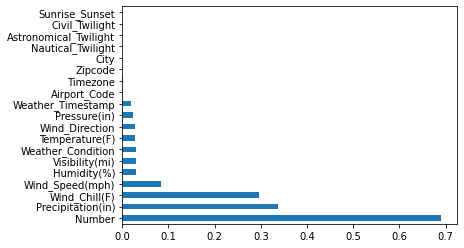

In [17]:
missing_prcentages_value.plot.barh()

In [18]:
# Removing columns not in use

del df["End_Time"]
del df["End_Lat"]
del df["End_Lng"]


In [19]:
# removing column 'number' because it contain more than 50% missing data

df = df.drop('Number', axis=1)

In [20]:
df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,40.10891,-83.09286,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,39.86542,-84.06280,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,39.10266,-84.52468,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,39.10148,-84.52341,0.219,At I-71/US-50/Exit 1 - Accident.,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,41.06213,-81.53784,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


## **Exploratory Data Analysis**

In [21]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## **columns to be analysis**


1.   City
2.   Start_Time
3.   Start_Lat, Start_Lng
4.   Tempreature
5.   Weather Condition












## **-------Analysisng , Asking and Answering Question-------**

### **City**

In [22]:
cities = len(df.City.unique())
cities

10658

### **Q** **-** **Does New York show up in the data? If yes, why is the count lower if this the most populated city?** 

In [23]:
'NY' in df.State

False

No , New York city is not in the data , Probably because of less traffic or proper traffic facilities and safety guards , less potholes in the road etc

### **Q - which City has the highest number of accidents?**

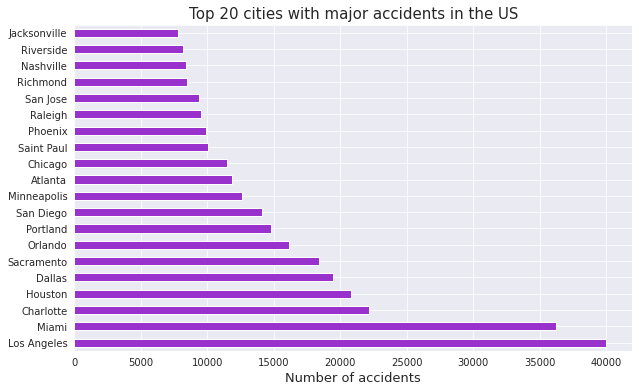

In [24]:
# cities with most number of accidents

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))

cities_by_accidents = df.City.value_counts()
cities_by_accidents.head(20).plot.barh(color = 'darkorchid')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Number of accidents', fontsize=13)
plt.title('Top 20 cities with major accidents in the US', fontsize = 15)

plt.show()

### **Q - Check wheather most cities has large number of accidents or smaller number of accidents**



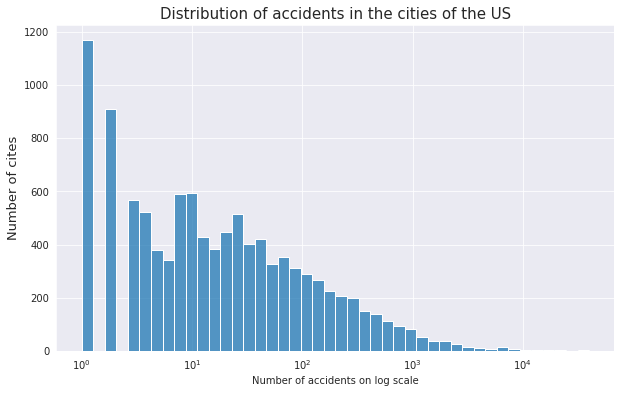

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

sns.histplot(cities_by_accidents , log_scale= True)

plt.yticks(fontsize=10)
plt.xlabel('Number of accidents on log scale', fontsize=10)
plt.ylabel('Number of cites', fontsize=13)
plt.title('Distribution of accidents in the cities of the US', fontsize = 15)
plt.show()



* From the above graph, we can see that only few cities have higher number of accidents while the rest have smaller number of accidents. There is an exponential decrease in the 
number of accidents per city. Let's seggregate the cities by high accidents and low accidents.



In [26]:
cities_by_accidents[cities_by_accidents == 1]

Burnett              1
Horse Shoe           1
Trementina           1
Waldoboro            1
Rochester Hills      1
                    ..
Weleetka             1
Washburn             1
Lynn Center          1
Rayland              1
Manchester Center    1
Name: City, Length: 1167, dtype: int64

In [27]:
high_accidents_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accidents_cities = cities_by_accidents[cities_by_accidents < 1000]

In [28]:
len(high_accidents_cities)

251

In [29]:
len(high_accidents_cities)/cities * 100

2.3550384687558643



* This shows that only 2% cities records more than 1000 accidents 



### **Start Time**

In [30]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time.head()

0   2016-02-08 00:37:08
1   2016-02-08 05:56:20
2   2016-02-08 06:15:39
3   2016-02-08 06:15:39
4   2016-02-08 06:51:45
Name: Start_Time, dtype: datetime64[ns]

### **Q - What time of the day are accidents most frequent in?**

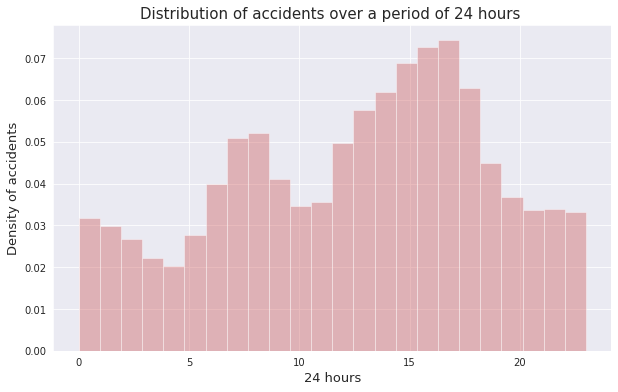

In [31]:
plt.figure(figsize=(10,6))

sns.distplot(df.Start_Time.dt.hour , bins = 24,kde = False, norm_hist = True , color = 'indianred')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('24 hours', fontsize=13)
plt.ylabel('Density of accidents', fontsize=13)
plt.title('Distribution of accidents over a period of 24 hours ', fontsize = 15)

plt.show()



* This graph shows that there are most accidenets occurs between 4 to 6 pm , probably because its evening time and people prefer to go out at this time



### **Q - Which days of the week have the most accidents?**

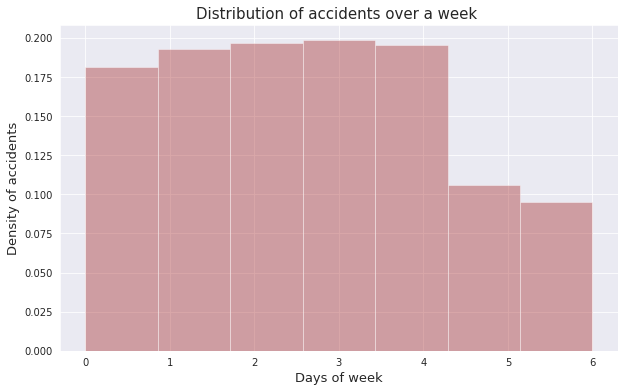

In [32]:
plt.figure(figsize=(10,6))

sns.distplot(df.Start_Time.dt.dayofweek , bins = 7,kde = False, norm_hist = True , color = 'brown')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Days of week', fontsize=13)
plt.ylabel('Density of accidents', fontsize=13)
plt.title('Distribution of accidents over a week ', fontsize = 15)

plt.show()

### Is the distribution of accidents by hours the same on weekend as on weekdays

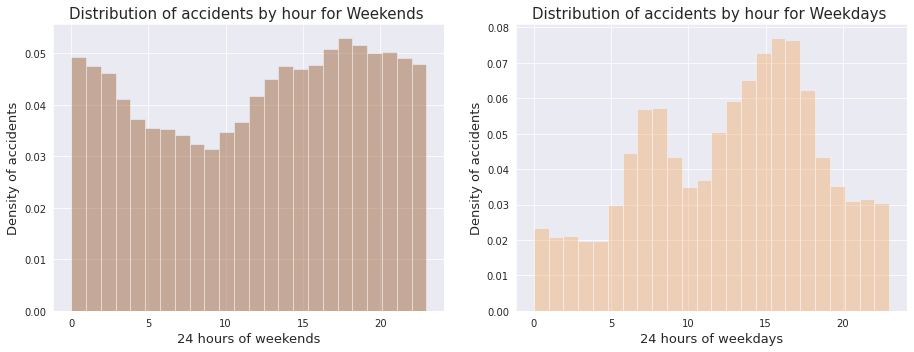

In [33]:
plt.figure(figsize=(13,5))

# plotting graphs for weekend accidents
plt.subplot(1, 2, 1) 

sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6 ]
sns.distplot(sundays_start_time.dt.hour , bins = 24,kde = False, norm_hist = True , color = 'saddlebrown')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('24 hours of weekends', fontsize=13)
plt.ylabel('Density of accidents', fontsize=13)
plt.title('Distribution of accidents by hour for Weekends ', fontsize = 15)

# plotting graphs for weekday accidents
plt.subplot(1, 2, 2)

mondays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0 ]
sns.distplot(mondays_start_time.dt.hour , bins = 24,kde = False, norm_hist = True , color = 'sandybrown')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('24 hours of weekdays', fontsize=13)
plt.ylabel('Density of accidents', fontsize=13)
plt.title('Distribution of accidents by hour for Weekdays ', fontsize = 15)

plt.tight_layout()
plt.show()

### **Q - Which months have the most accidents?**

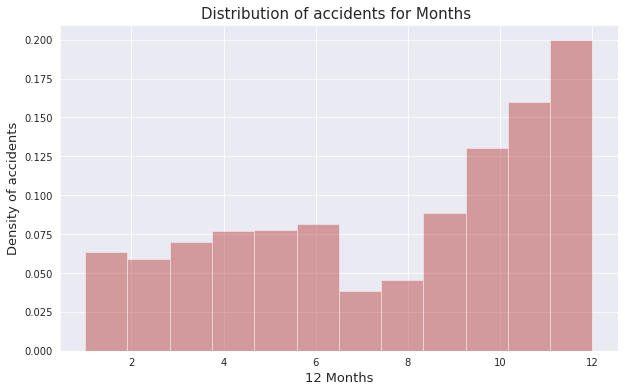

In [34]:
plt.figure(figsize=(10,6))

sns.distplot(df.Start_Time.dt.month , bins = 12,kde = False, norm_hist = True , color = 'firebrick')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('12 Months', fontsize=13)
plt.ylabel('Density of accidents', fontsize=13)
plt.title('Distribution of accidents for Months ', fontsize = 15)

plt.show()

### **Q - What is the trend of accidents year over year (decreasing/increasing?)**

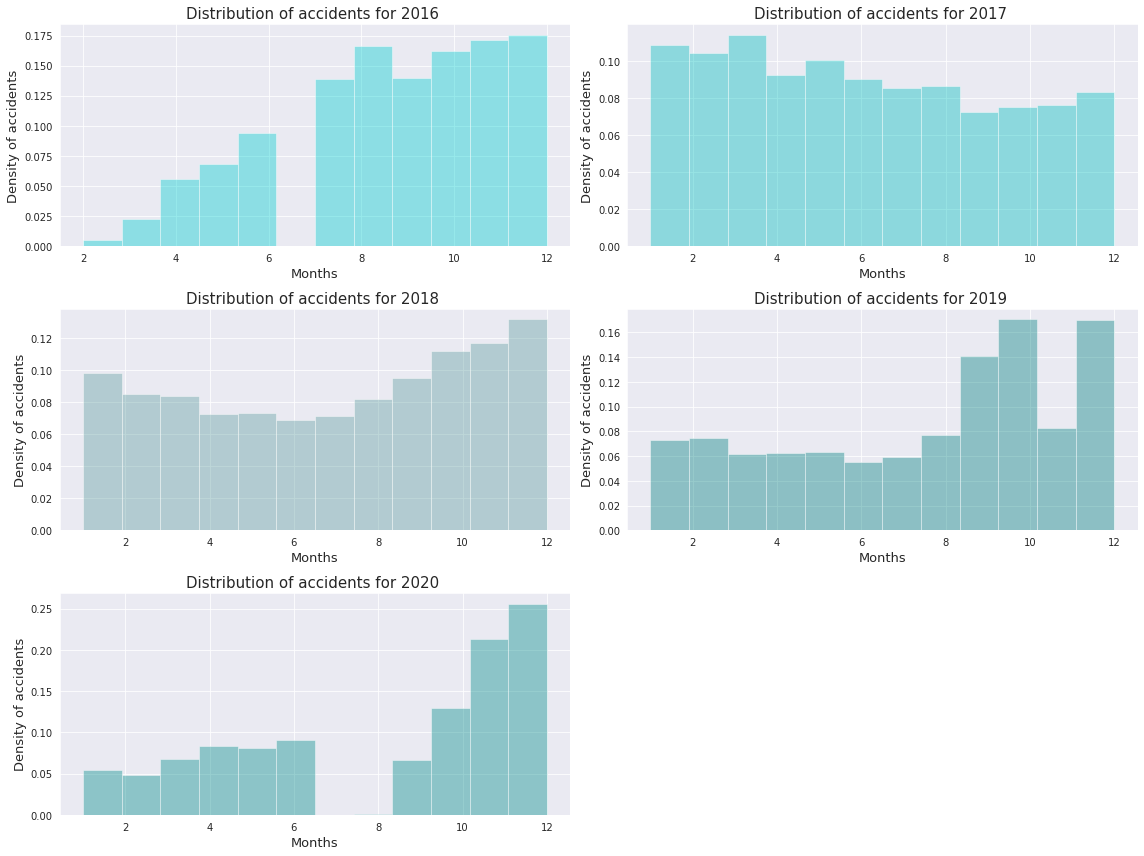

In [35]:
plt.figure(figsize=(16,12))

#plotting trend of 2016
plt.subplot(3, 2, 1)

df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month , bins = 12,kde = False, norm_hist = True, color = 'darkturquoise')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Density of accidents', fontsize=13)
plt.title('Distribution of accidents for 2016 ', fontsize = 15)

#plotting trend of 2017
plt.subplot(3, 2, 2)

df_2017 = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2017.Start_Time.dt.month , bins = 12,kde = False, norm_hist = True , color = 'c')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Density of accidents', fontsize=13)
plt.title('Distribution of accidents for 2017 ', fontsize = 15)

#plotting trend of 2018
plt.subplot(3, 2, 3)

df_2018 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month , bins = 12,kde = False, norm_hist = True , color = 'cadetblue')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Density of accidents', fontsize=13)
plt.title('Distribution of accidents for 2018 ', fontsize = 15)

#plotting trend of 2019
plt.subplot(3, 2, 4)

df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month , bins = 12,kde = False, norm_hist = True , color = 'teal')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Density of accidents', fontsize=13)
plt.title('Distribution of accidents for 2019 ', fontsize = 15)

#plotting trend of 2020
plt.subplot(3, 2, 5)

df_2020 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2020.Start_Time.dt.month , bins = 12,kde = False, norm_hist = True , color = 'darkcyan')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Density of accidents', fontsize=13)
plt.title('Distribution of accidents for 2020 ', fontsize = 15)


plt.tight_layout()
plt.show()

In [36]:
'Source' in df.columns

False

### **Start lat and Start long**

In [37]:
df.Start_Lat

0          40.10891
1          39.86542
2          39.10266
3          39.10148
4          41.06213
             ...   
1516059    34.00248
1516060    32.76696
1516061    33.77545
1516062    33.99246
1516063    34.13393
Name: Start_Lat, Length: 1516064, dtype: float64

In [38]:
df.Start_Lng

0          -83.09286
1          -84.06280
2          -84.52468
3          -84.52341
4          -81.53784
             ...    
1516059   -117.37936
1516060   -117.14806
1516061   -117.84779
1516062   -118.40302
1516063   -117.23092
Name: Start_Lng, Length: 1516064, dtype: float64

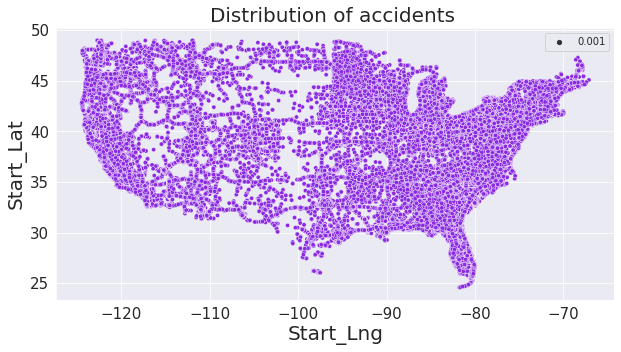

In [39]:
plt.figure(figsize=(10,5))

sns.scatterplot(y = df.Start_Lat , x = df.Start_Lng , size = 0.001 , color = 'blueviolet')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Start_Lng',fontsize=20)
plt.ylabel('Start_Lat', fontsize=20)
plt.title('Distribution of accidents ', fontsize = 20)

plt.show()

### **Tempreature**

## **Q - Are there more accidents in colder area then in hotter area ?**

In [40]:
df['Temperature(F)']

0          42.1
1          36.9
2          36.0
3          36.0
4          39.0
           ... 
1516059    86.0
1516060    70.0
1516061    73.0
1516062    71.0
1516063    79.0
Name: Temperature(F), Length: 1516064, dtype: float64

In [41]:
cold_temp_count = len(df[df['Temperature(F)'] < 70.0])
hot_temp_count = len(df[df['Temperature(F)'] >= 70.0])

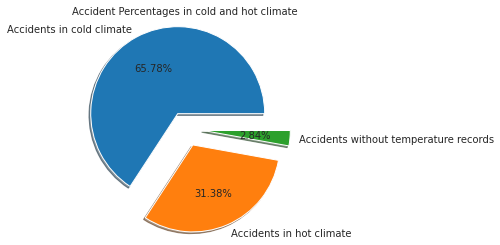

In [42]:
lab = ['Accidents in cold climate', 'Accidents in hot climate', 'Accidents without temperature records']

plt.figure(figsize=(8,4))
plt.pie([cold_temp_count, hot_temp_count, len(df) - cold_temp_count - hot_temp_count], labels = lab, autopct = '%0.2f%%', shadow = True, explode = [0.2,0.2,0.2], textprops={'fontsize': 10})
plt.title('Accident Percentages in cold and hot climate ', fontsize = 10)
plt.show()





*  Yes , From the above Pie Chart we can see that there 65% accidents in colder area and 31% in warmer area 





### **Weather Condition**

## **Q - Percentages of Accidents at Certain weather condition**

In [43]:
accident_weather_condition = (df.Weather_Condition.value_counts() / len(df)) * 100
accident_weather_condition = accident_weather_condition.sort_values(ascending = False)

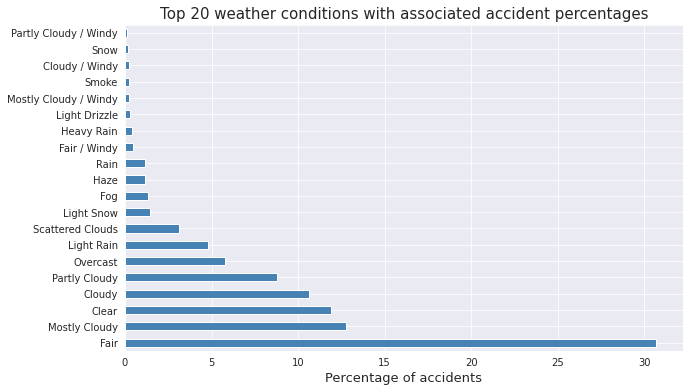

In [44]:
plt.figure(figsize=(10,6))

accident_weather_condition.head(20).plot.barh(color = 'steelblue')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Percentage of accidents', fontsize=13)
plt.title('Top 20 weather conditions with associated accident percentages', fontsize = 15)

plt.show()

**----Correlation matrix for dataset variables----**

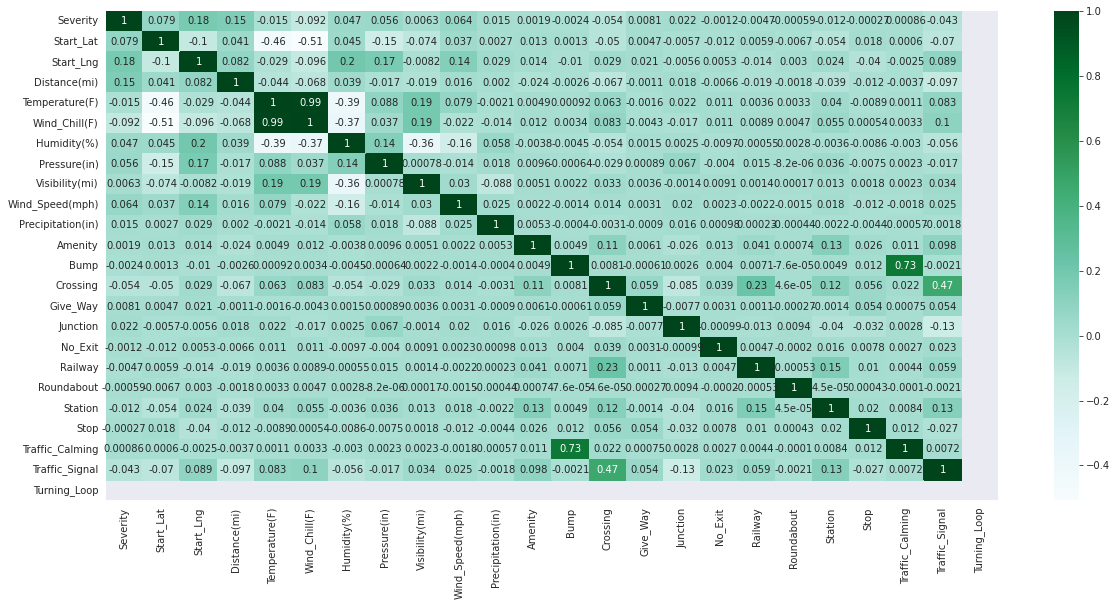

In [45]:
cor= df.corr()
plt.figure(figsize=(20,9))
sns.heatmap(cor, annot=True , cmap='BuGn')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## **Summary and conclusion**

*   This dataset does not contain data from New York city.
*   About 2 percent of the cities record more than 1000 accidents per year.
*   An increasing trend is observed in the number of accidents year over year.
*   Majority of accidents occur in Fair, Clear, Mostly cloudy, Partly cloudy , Cloudy and overcast conditions.
*  About 65 percent of the accidents occur in colder areas while 35 percent of the accidents occur in hotter areas.



## **References**


1.  https://datahack.analyticsvidhya.com/contest/hacklive-guided-community-hackathon/?utm_source=auto-email#ProblemStatement
2. https://seaborn.pydata.org/tutorial/categorical.html
3. https://matplotlib.org/
4. https://www.kaggle.com/

